# Lifecycle of a Data Science Projects

### Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
### Feature Engineering---Handling Missing Values
### Why are their Missing values?? Survey--Depression Survey

They hesitate to put down the information

Survey informations are not that valid

Men--salary

Women---age

People may have died----NAN

Data Science Projects---Dataset should be collected from multiple sources

# What are the different types of Missing Data?

# 1.Missing Completely at Random, MCAR: A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [1]:
import pandas as pd

In [27]:
df = pd.read_csv(r"C:\Users\pbann\OneDrive\Desktop\science\data set\titanic_dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### AGE AND CABIN comes under mssing at random

# Missing Data Not At Random(MNAR): Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.


In [10]:
import numpy as np 
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)  # nan replaced by 1 elso 0

df['cabin_null'].mean()

0.7710437710437711

In [11]:
df.groupby(['Survived'])['cabin_null'].mean()  # from survived 60% data is missing/ 87% is not survived data missing

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

# Missing At Random(MAR)

# techniques of handling missing values:

## 1. Mean/ Median/Mode replacement

## 2. Random Sample Imputation

## 3. Capturing NAN values with a new feature

## 4. End of Distribution imputation

## 5. Arbitrary imputation

## 6. Frequent categories imputation

# Mean/ MEdian /Mode imputation
### When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [22]:
df1 = df[['Age','Fare','Survived']]

In [16]:
def impute_nan(df,variable,median):
    df[variable+'_median'] = df[variable].fillna(median)

In [24]:
median = df1.Age.median()
median

28.0

In [25]:
impute_nan(df1,'Age',median)

C:\Users\pbann\AppData\Local\Temp/ipykernel_6248/2621480080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+'_median'] = df[variable].fillna(median)


In [26]:
df1.head()

,Age,Fare,Survived,Age_median
0,22.0,7.2500,0,22.0
1,38.0,71.2833,1,38.0
2,26.0,7.9250,1,26.0
3,35.0,53.1000,1,35.0
4,35.0,8.0500,0,35.0


In [28]:
df1.isnull().sum()

Age           177
Fare            0
Survived        0
Age_median      0
dtype: int64

In [29]:
print(df1['Age'].std())
print(df1['Age_median'].std())

14.526497332334044
13.019696550973194


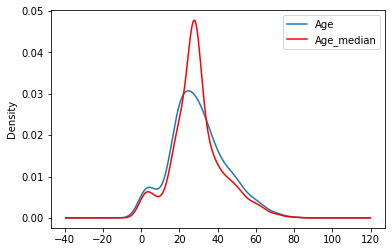

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
df1['Age'].plot(kind='kde', ax=ax)
df1.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Advantages and disadvantages of mean/median/mode imputation

### 1. Easy to implement(Robust to outliers)

### 2. Faster way to obtain the complete dataset #### Disadvantages

### 3. Change or Distortion in the original variance

### 4. Impacts Correlation

# Random Sample Imputation
### Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

### When should it be used?
It assumes that the data are missing completely at random(MCAR)

In [35]:
df1 = df[['Age','Fare','Survived']]
df1

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,1
888,NaN,23.4500,0
889,26.0,30.0000,1


In [36]:
df1.isnull().mean()

Age         0.198653
Fare        0.000000
Survived    0.000000
dtype: float64

In [ ]:
df1['Age'].isnull()

In [40]:
df1['Age'].dropna().sample()  # this takes any value of age randomly

805    31.0
Name: Age, dtype: float64

In [42]:
df1['Age'].dropna().sample(df1['Age'].isnull().sum(),random_state=0) # dropping nan and then replacing based on index of nan

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [50]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [54]:
impute_nan(df1,'Age',median)


C:\Users\pbann\AppData\Local\Temp/ipykernel_6248/1150863296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+"_median"]=df[variable].fillna(median)
C:\Users\pbann\AppData\Local\Temp/ipykernel_6248/1150863296.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+"_random"]=df[variable]


In [55]:
df1

,Age,Fare,Survived,Age_median,Age_random
0,22.0,7.2500,0,22.0,22.0
1,38.0,71.2833,1,38.0,38.0
2,26.0,7.9250,1,26.0,26.0
3,35.0,53.1000,1,35.0,35.0
4,35.0,8.0500,0,35.0,35.0
...,...,...,...,...,...
886,27.0,13.0000,0,27.0,27.0
887,19.0,30.0000,1,19.0,19.0
888,NaN,23.4500,0,28.0,15.0
889,26.0,30.0000,1,26.0,26.0


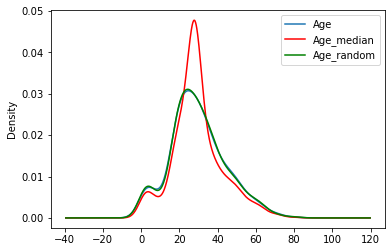

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)
df1['Age'].plot(kind='kde', ax=ax)
df1.Age_median.plot(kind='kde', ax=ax, color='red')
df1.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# capturing nan with new features

### It works well if the data are not missing completely at random

In [59]:
df1 = df[['Age','Fare','Survived']]
df1

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,1
888,NaN,23.4500,0
889,26.0,30.0000,1


In [60]:
import numpy as np
df1['Age_NAN']=np.where(df1['Age'].isnull(),1,0)

C:\Users\pbann\AppData\Local\Temp/ipykernel_6248/4147154565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age_NAN']=np.where(df1['Age'].isnull(),1,0)


In [61]:
df1

,Age,Fare,Survived,Age_NAN
0,22.0,7.2500,0,0
1,38.0,71.2833,1,0
2,26.0,7.9250,1,0
3,35.0,53.1000,1,0
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,1,0
888,NaN,23.4500,0,1
889,26.0,30.0000,1,0


# Advantages
Easy to implement
Captures the importance of missing values
# Disadvantages
Creating Additional Features(Curse of Dimensionality)


# End of Distribution imputation


In [62]:
df1 = df[['Age','Fare','Survived']]
df1

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,1
888,NaN,23.4500,0
889,26.0,30.0000,1


<AxesSubplot:>

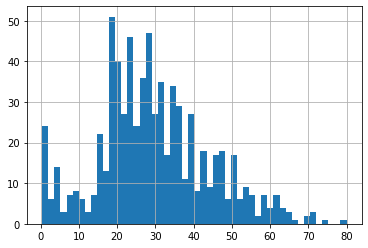

In [63]:
df1.Age.hist(bins=50)

In [69]:
extreme = df1.Age.median()+3*df1.Age.std()

C:\Users\pbann\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

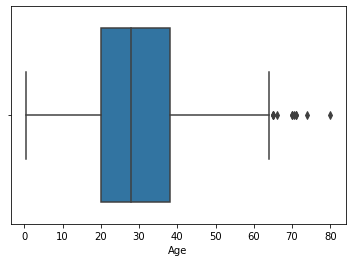

In [66]:
import seaborn as sns
sns.boxplot('Age',data=df1)

In [67]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)


In [70]:
impute_nan(df1,'Age',df1.Age.median(),extreme)

C:\Users\pbann\AppData\Local\Temp/ipykernel_6248/3169493324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+"_end_distribution"]=df[variable].fillna(extreme)
C:\Users\pbann\AppData\Local\Temp/ipykernel_6248/3169493324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable].fillna(median,inplace=True)


In [71]:
df1

,Age,Fare,Survived,Age_end_distribution
0,22.0,7.2500,0,22.000000
1,38.0,71.2833,1,38.000000
2,26.0,7.9250,1,26.000000
3,35.0,53.1000,1,35.000000
4,35.0,8.0500,0,35.000000
...,...,...,...,...
886,27.0,13.0000,0,27.000000
887,19.0,30.0000,1,19.000000
888,28.0,23.4500,0,71.579492
889,26.0,30.0000,1,26.000000


<AxesSubplot:>

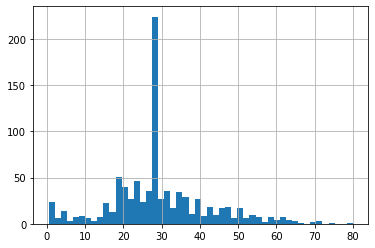

In [75]:
df1['Age'].hist(bins=50)




<AxesSubplot:>

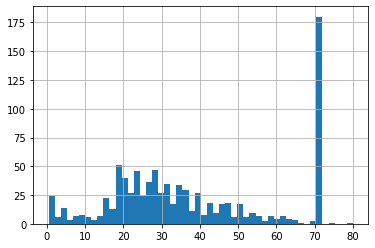

In [74]:
df1['Age_end_distribution'].hist(bins=50)